## **Proyek UTS Kecerdasan Buatan - Decision Tree** ##

Kelompok 5:
1. Muhammad Aidan Daffa Junaidi / 1906300800
2. Rubyna Hamaswari / 1906357925

# 1. Overview

**Deskripsi Data**:

Data yang digunakan adalah data **Cardiotocography** yang terdiri atas atribut-atribut berikut:

```
LB - FHR baseline (beats per minute)
AC - # of accelerations per second
FM - # of fetal movements per second
UC - # of uterine contractions per second
DL - # of light decelerations per second
DS - # of severe decelerations per second
DP - # of prolongued decelerations per second
ASTV - percentage of time with abnormal short term variability
MSTV - mean value of short term variability
ALTV - percentage of time with abnormal long term variability
MLTV - mean value of long term variability
Width - width of FHR histogram
Min - minimum of FHR histogram
Max - Maximum of FHR histogram
Nmax - # of histogram peaks
Nzeros - # of histogram zeros
Mode - histogram mode
Mean - histogram mean
Median - histogram median
Variance - histogram variance
Tendency - histogram tendency
CLASS - FHR pattern class code (1 to 10)
NSP - fetal state class code (N=normal; S=suspect; P=pathologic)
```

##2. Import Library dan Fungsi


In [ ]:
# For Data Visualisation
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from matplotlib.colors import ListedColormap

# For Data Manipulation
import numpy as np 
import pandas as pd
import sklearn
from itertools import cycle

# For Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# For Classification Results
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from scipy import interp
from sklearn.exceptions import NotFittedError

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Importing Models
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

print(pd.__version__)

1.3.5


In [ ]:
#fungsi confusion matrix

def confmatrix(y_pred, title):
    cm = metrics.confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    
    plt.figure(figsize = (10,7))
    plt.title(title)
    
    sns.set(font_scale=1.2) # For label size
    sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 10}) # Font size
    
# fungsi mengubah classification_report menjadi dataframe

def get_classification_report(y_test, y_pred):
    from sklearn import metrics
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    df_classification_report = df_classification_report
    return df_classification_report
   
#target nama untuk confusion matrix
target_names = ['Normal', 'Suspect', 'Pathologic']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##3. Import Dataset

In [ ]:
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.9 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
col_names =  [ '1',        '2',       '3',       '4',       '5',       '6',
             '7',       '8',       '9',        "nan",       'LB',       'AC',
             'FM',       'UC',       'DL',       'DS',       'DP',     'ASTV',
           'MSTV',     'ALTV',     'MLTV',    'Width',      'Min',      'Max',
           'Nmax',   'Nzeros',     'Mode',     'Mean',   'Median', 'Variance',
       'Tendency',        "nan",        'A',        'B',        'C',        'D',
              'E',       'AD',       'DE',       'LD',       'FS',     'SUSP',
              "nan",    'CLASS',        "nan",      'NSP']

In [ ]:
xls = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00193/CTG.xls'
df = pd.read_excel(xls, 'Data', names = col_names)
df.head(10)

,1,2,3,4,5,6,7,8,9,nan,...,E,AD,DE,LD,FS,SUSP,nan.2,CLASS,nan.3,NSP
0,b,e,AC,FM,UC,DL,DS,DP,DR,NaN,...,E,AD,DE,LD,FS,SUSP,NaN,CLASS,NaN,NSP
1,240,357,0,0,0,0,0,0,0,NaN,...,-1,-1,-1,-1,1,-1,NaN,9,NaN,2
2,5,632,4,0,4,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
3,177,779,2,0,5,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
4,411,1192,2,0,6,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
5,533,1147,4,0,5,0,0,0,0,NaN,...,-1,-1,-1,-1,-1,-1,NaN,2,NaN,1
6,0,953,1,0,10,9,0,2,0,NaN,...,-1,-1,-1,1,-1,-1,NaN,8,NaN,3
7,240,953,1,0,9,6,0,2,0,NaN,...,-1,-1,-1,1,-1,-1,NaN,8,NaN,3
8,62,679,0,0,0,0,0,0,0,NaN,...,-1,-1,-1,-1,1,-1,NaN,9,NaN,3
9,120,779,0,0,1,0,0,0,0,NaN,...,-1,-1,-1,-1,1,-1,NaN,9,NaN,3


In [ ]:
df = df.drop(df.index[0])

In [ ]:
df = df.loc[:,df.notna().any(axis=0)]
df.head(10)

,1,2,3,4,5,6,7,8,9,LB,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
1,240,357,0,0,0,0,0,0,0,120,...,-1,-1,-1,-1,-1,-1,1,-1,9,2
2,5,632,4,0,4,2,0,0,0,132,...,-1,-1,-1,1,-1,-1,-1,-1,6,1
3,177,779,2,0,5,2,0,0,0,133,...,-1,-1,-1,1,-1,-1,-1,-1,6,1
4,411,1192,2,0,6,2,0,0,0,134,...,-1,-1,-1,1,-1,-1,-1,-1,6,1
5,533,1147,4,0,5,0,0,0,0,132,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1
6,0,953,1,0,10,9,0,2,0,134,...,-1,-1,-1,-1,-1,1,-1,-1,8,3
7,240,953,1,0,9,6,0,2,0,134,...,-1,-1,-1,-1,-1,1,-1,-1,8,3
8,62,679,0,0,0,0,0,0,0,122,...,-1,-1,-1,-1,-1,-1,1,-1,9,3
9,120,779,0,0,1,0,0,0,0,122,...,-1,-1,-1,-1,-1,-1,1,-1,9,3
10,181,1192,0,0,3,0,0,0,0,122,...,-1,-1,-1,-1,-1,-1,1,-1,9,3


In [ ]:
df.drop(columns = df.columns[0:9], inplace = True, axis=1)
df.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
1,120,0,0,0,0,0,0,73,0.5,43,...,-1,-1,-1,-1,-1,-1,1,-1,9,2
2,132,0.00638,0,0.00638,0.00319,0,0,17,2.1,0,...,-1,-1,-1,1,-1,-1,-1,-1,6,1
3,133,0.003322,0,0.008306,0.003322,0,0,16,2.1,0,...,-1,-1,-1,1,-1,-1,-1,-1,6,1
4,134,0.002561,0,0.007682,0.002561,0,0,16,2.4,0,...,-1,-1,-1,1,-1,-1,-1,-1,6,1
5,132,0.006515,0,0.008143,0,0,0,16,2.4,0,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1
6,134,0.001049,0,0.010493,0.009444,0,0.002099,26,5.9,0,...,-1,-1,-1,-1,-1,1,-1,-1,8,3
7,134,0.001403,0,0.012623,0.008415,0,0.002805,29,6.3,0,...,-1,-1,-1,-1,-1,1,-1,-1,8,3
8,122,0,0,0,0,0,0,83,0.5,6,...,-1,-1,-1,-1,-1,-1,1,-1,9,3
9,122,0,0,0.001517,0,0,0,84,0.5,5,...,-1,-1,-1,-1,-1,-1,1,-1,9,3
10,122,0,0,0.002967,0,0,0,86,0.3,6,...,-1,-1,-1,-1,-1,-1,1,-1,9,3


In [ ]:
df.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE',
       'LD', 'FS', 'SUSP', 'CLASS', 'NSP'],
      dtype='object')

In [ ]:
df.drop(['A','B','C', 'D', 'E',	'AD',	'DE', 'LD', 'FS', 'SUSP','CLASS'], inplace = True,  axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency', 'NSP'],
      dtype='object')

In [ ]:
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
1,120,0,0,0,0,0,0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
2,132,0.00638,0,0.00638,0.00319,0,0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
3,133,0.003322,0,0.008306,0.003322,0,0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
4,134,0.002561,0,0.007682,0.002561,0,0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
5,132,0.006515,0,0.008143,0,0,0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,140,0.000679,0,0.00611,0,0,0,78,0.4,27,...,103,169,6,0,152,147,151,4,1,2
2126,142,0.001616,0.001616,0.008078,0,0,0,74,0.4,36,...,117,159,2,1,145,143,145,1,0,1
2127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2128,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop(df.index[2126:2129])

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
1,120,0,0,0,0,0,0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
2,132,0.00638,0,0.00638,0.00319,0,0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
3,133,0.003322,0,0.008306,0.003322,0,0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
4,134,0.002561,0,0.007682,0.002561,0,0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
5,132,0.006515,0,0.008143,0,0,0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,140,0,0,0.007426,0,0,0,79,0.2,25,...,137,177,4,0,153,150,152,2,0,2
2123,140,0.000775,0,0.006971,0,0,0,78,0.4,22,...,103,169,6,0,152,148,151,3,1,2
2124,140,0.00098,0,0.006863,0,0,0,79,0.4,20,...,103,170,5,0,153,148,152,4,1,2
2125,140,0.000679,0,0.00611,0,0,0,78,0.4,27,...,103,169,6,0,152,147,151,4,1,2


##4. Data Preprocessing



In [ ]:
#Menghapus data duplikat
df.drop_duplicates(inplace=True)

In [ ]:
#Mengecek apakah ada data yang null pada data red wine
df.isnull().sum()

LB          3
AC          3
FM          2
UC          2
DL          1
DS          1
DP          1
ASTV        2
MSTV        2
ALTV        2
MLTV        2
Width       3
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
NSP         3
dtype: int64

In [ ]:
# Define the list of fields with missing values
missing_col = ['LB', 'AC', 'FM', 'UC','FM' ,'UC' , 'DL' ,'DS' ,'DP' , 'ASTV' ,'MSTV' ,'ALTV' ,'MLTV' ,'Width' ,'Min' ,'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'NSP'] 

In [ ]:
# Use the for loop to process the missing values in the multiple fields, fill with mode() or mean()
for col in missing_col: 
    df[col]=df[col].fillna(int(df[col].mean()))

In [ ]:
#Mengecek apakah ada data yang null pada data red wine
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
NSP         0
dtype: int64

# Decision Tree Classifier


Data splitting dan fitting dengan ketentuan:
1. Pengujian dilakukan dengan cross-validation (50% data 
training, 50% data testing, lalu tukar data training dengan 
testing untuk diuji ulang)
2. Lakukan minimal 3 macam variasi hyperparameter untuk
masing-masing classifier yang diujikan. 
3. Untuk classifier yang mempunyai inisialisasi random, pada masing-masing setting hyperparameter lakukan sebanyak 5x pengulangan
dan tampilkan hasil rata-ratanya)




In [ ]:
X = df.drop('NSP', axis=1)
y = df['NSP']

## Parameter Hypertuning dengan `GridSearch`



In [ ]:
# Hyperparameter SVC
criterion = ['gini','entropy']
max_features = ['auto','sqrt','log2']

In [ ]:
# Spliting data dengan rasio 50:50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=11)

# Cross validation dengan teknik Stratified KFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=11)

#hyperparameter
param_grid = {'max_features'      : max_features, 
              'criterion'         : criterion  }

grid_search = GridSearchCV(DecisionTreeClassifier(),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=kfold,
                           n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=11, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

In [ ]:
grid_search.best_params_ # Menampilkan best parameter 

{'criterion': 'entropy', 'max_features': 'log2'}

## Training dengan Best Parameter


In [ ]:
dt_best = DecisionTreeClassifier(criterion = 'entropy', max_features = 'log2')
dt_best.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features='log2')

In [ ]:
y1_pred = dt_best.predict(X_test)
print(classification_report(y_test, y1_pred, target_names = target_names))

              precision    recall  f1-score   support

      Normal       0.94      0.97      0.96       828
     Suspect       0.75      0.68      0.71       140
  Pathologic       0.77      0.71      0.74        91

    accuracy                           0.91      1059
   macro avg       0.82      0.79      0.80      1059
weighted avg       0.90      0.91      0.91      1059



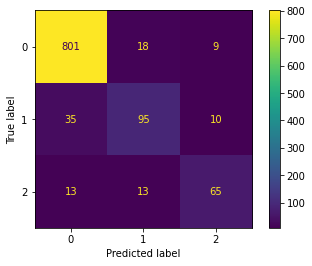

In [ ]:
cm_1 = confusion_matrix(y_test, y1_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= cm_1)
disp.plot()

In [ ]:
DT_1 = get_classification_report(y_test, y1_pred)
DT_1.to_csv('/content/drive/MyDrive/UTS_AI/DT1.csv')

## Training tanpa Hypertuning

In [ ]:
dt_default = DecisionTreeClassifier()
dt_default.fit(X_train, y_train)
y2_pred = dt_default.predict(X_test)
print(classification_report(y_test, y2_pred, target_names = target_names))

              precision    recall  f1-score   support

      Normal       0.94      0.95      0.95       828
     Suspect       0.71      0.71      0.71       140
  Pathologic       0.94      0.85      0.89        91

    accuracy                           0.91      1059
   macro avg       0.86      0.84      0.85      1059
weighted avg       0.91      0.91      0.91      1059



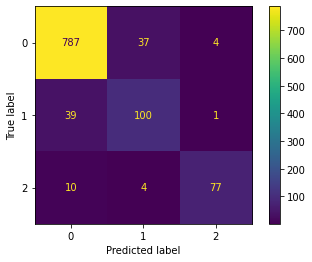

In [ ]:
cm_2 = confusion_matrix(y_test, y2_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= cm_2)
disp.plot()

In [ ]:
DT_2 = get_classification_report(y_test, y2_pred)
DT_2.to_csv('/content/drive/MyDrive/UTS_AI/DT2.csv')

# Training dengan Best Parameter dan `max_depth = 20`



In [ ]:
dt_variasi = DecisionTreeClassifier(criterion = 'entropy', max_features = 'log2',max_depth = 20)
dt_variasi.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='log2')

In [ ]:
y3_pred = dt_variasi.predict(X_test)
print(classification_report(y_test, y3_pred, target_names = target_names))

              precision    recall  f1-score   support

      Normal       0.92      0.93      0.93       828
     Suspect       0.61      0.59      0.60       140
  Pathologic       0.84      0.81      0.83        91

    accuracy                           0.88      1059
   macro avg       0.79      0.78      0.78      1059
weighted avg       0.88      0.88      0.88      1059



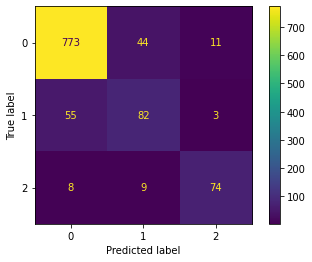

In [ ]:
cm_3 = confusion_matrix(y_test, y3_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= cm_3)
disp.plot()

In [ ]:
DT_3 = get_classification_report(y_test, y3_pred)
DT_3.to_csv('/content/drive/MyDrive/UTS_AI/DT3.csv')

# Referensi

**Referensi**
1. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html 
2. https://scikit-learn.org/stable/modules/cross_validation.html 